# Week_7 복습과제

# 1. Default of credit card clients Data Set으로 PCA 성능 평가하기

default of credit card client Dataset의 column별 설명

*   ID: ID of each client
*   LIMIT_BAL: Amount of given credit in NT dollars 
*   SEX: Gender (1=male, 2=female)
*   EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
*   MARRIAGE: Marital status (1=married, 2=single, 3=others)
*   AGE: Age in years
*   PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
*   PAY_2: Repayment status in August, 2005
*   PAY_3: Repayment status in July, 2005
*   PAY_4: Repayment status in June, 2005
*   PAY_5: Repayment status in May, 2005
*   PAY_6: Repayment status in April, 2005
*   BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
*   BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
*   BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
*   BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
*   BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
*   BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
*   PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
*   PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
*   PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
*   PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
*   PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
*   PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
*   default.payment.next.month: Default payment (1=yes, 0=no)

## 1. 데이터 불러오기
#### 판다스에서 제공하는 read_excel()을 이용해 필요한 데이터를 불러와주세요.
#### 제공된 엑셀 파일에서 Data 이름의 시트만을 이용합니다. header=1, sheet_name='Data' 로 변수를 지정하고 수행해주세요.

### #1. 데이터를 불러와 불필요한 칼럼인 ID를 지운 후 df란 이름으로 저장하시오. 

ID 칼럼이 잘 삭제되었는지 확인하기 위해 df의 3번째 열까지 출력하세요.

In [4]:
import pandas as pd
df = pd.read_excel('Week7_dataset.xls',header=1, sheet_name='Data' )
df = df.drop(['ID'], axis=1)
df.head(3)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


### #2. 주어진 데이터의 행과 열의 개수를 출력하시오.

In [6]:
import numpy as np
np.shape(df)

(30000, 24)

## 2. 데이터 전처리하기

주어진 데이터에서 타깃값은 'default payment next month' 속성으로, '다음달 연체 여부'를 의미하며 '연체'일 경우 1, '정상납부'일 경우 0입니다.

#### #1. 판다스에서 제공하는 rename() 함수를 이용해 원본 데이터셋에서 PAY_0을 PAY_1으로, 타깃 칼럼의 이름을 'default'으로 변경하시오.

코드를 시행한 후 변경한 데이터셋의 3번째 열까지 출력해 제대로 바뀌었는지 확인하세요.

In [7]:
df.rename(columns = {"PAY_0":"PAY_1", "default payment next month":"default"}, inplace = True)

In [8]:
## 확인 코드 작성
df.head(3)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


#### #2. 타깃값인 'default' 칼럼을 y_target 변수로 별도로 지정하고 피처 데이터는 default 칼럼을 제외한 별도의 DataFrame (이름: X_features)으로 만드시오.

In [9]:
y_target = df['default']
X_features = df.drop(['default'], axis=1)

## 3. 각 속성 간의 상관도를 구하기
해당 데이터셋은 23개의 속성 데이터가 있으나, 각 속성끼리 상관도가 매우 높습니다. 
#### DataFrame의 corr()을 이용해 각 속성 간의 상관도를 구한 뒤 이를 Seaborn의 heatmap으로 시각화하시오.

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

corrmat=df.corr()
corrmat

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
LIMIT_BAL,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,...,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
SEX,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,-0.055064,...,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
EDUCATION,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,0.097520,...,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200,0.028006
MARRIAGE,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,0.035629,...,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641,-0.024339
AGE,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,...,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
PAY_1,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,...,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
PAY_2,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,...,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551
PAY_3,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,...,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253
PAY_4,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,...,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614
PAY_5,-0.249411,-0.055064,0.097520,0.035629,-0.053826,0.509426,0.622780,0.686775,0.819835,1.000000,...,0.271915,0.269783,0.262509,-0.006089,-0.003191,0.009062,-0.058299,-0.033337,-0.023027,0.204149


figsize=(14,14)로 설정해주세요.
heatmap을 사용할 때 annot=True, fmt='.1g' 변수를 설정해주세요.

<AxesSubplot:>

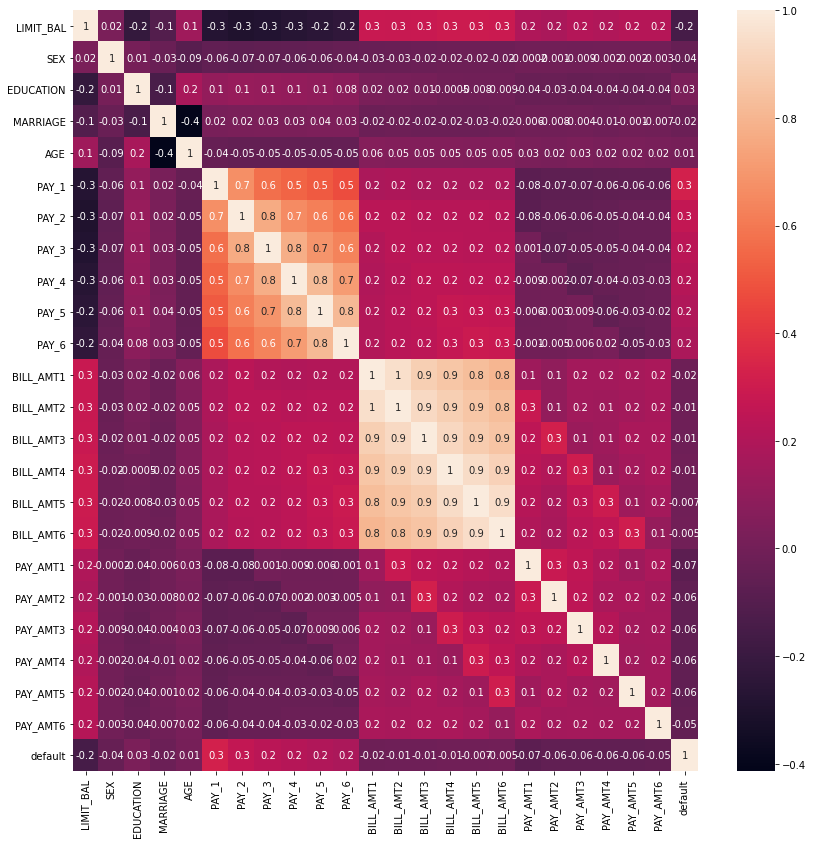

In [14]:
plt.subplots(figsize=(14,14))
sns.heatmap(corrmat, annot=True, fmt='.1g')

## 3. PCA

#### 위에서 구한 상관도를 통해 BILL_AMT1 ~ BILL_AMT6까지 6개의 속성들이 0.9 이상으로 상관도가 매우 높다는 것을 알 수 있습니다.
#### 이렇게 높은 상관도를 가진 속성들은 소수의 PCA만으로도 자연스럽게 이 속성들의 변동성을 수용할 수 있습니다.
#### 따라서 BILL__AMT1 ~ BILL_AMT6까지 6개 속성을 2개의 컴포넌트로 PCA 변환할 수 있다.

In [17]:
# 필요한 모듈 불러오기
from sklearn.decomposition import PCA

#### #1. BILL_AMT1 ~ BIL_AMT6까지 6개의 속성명을 생성해 cols_bill이란 이름으로 저장하시오.

###### 힌트: for문으로 'BILL_AMT'란 문자열과 str()함수, 그리고 range()함수를 이용해 칼럼명을 생성하세요.

In [15]:
cols_bill = ["BILL_AMT" + str(i) for i in range(1, 7)]

In [16]:
## 제대로 cols_bill이 만들어졌는지 확인
cols_bill

['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

#### #2. StandardScaler와 cols_bill을 이용해 BILL_AMT1 ~ BILL_AMT6까지의 속성들을 scale하고 cols_scaled란 이름으로 저장하시오.



In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 
cols_scaled = scaler.fit_transform(X_features[cols_bill]) 

#### #3. 2개의 PCA 속성을 가진 PCA 객체를 이용해 cols_scaled 데이터의 component별 변동성을 출력하시오.

PCA의 explained_variance_ratio_ 변수를 출력하면 됩니다. 이때 이 계산을 위해 fit()을 호출해주세요.


In [23]:
pca = PCA(n_components=2)
X_features_pca = pca.fit_transform(cols_scaled) 

In [24]:
### PCA component별 변동성 확인
print(pca.explained_variance_ratio_)

[0.90555253 0.0509867 ]


위에서 얻은 변동성 결과로 6가지 속성들의 상관도를 평가해보세요. (어떤 축을 기준으로 판단했는지도 명시해주세요.)

답: 단 2개의 PCA 컴포넌트만으로도 6개 속성의 변동성을 약 95% 이상 설명할 수 있다. 특히 첫 번째 PCA 축으로 90%의 변동성을 수용할 정도로 6개 속성의 상관도가 매우 높다.

## 4. 원본 데이터셋과 PCA 변환 데이터셋의 분류 예측 결과 비교

이 문제에서는 X_features와 y_target을 이용합니다.

#### #1. 랜덤 포레스트를 이용해 원본 데이터셋을 교차 검증 세트로 분류 예측하시오.
#### 랜덤포레스트에서 n_estimators=300, random_state=156 이라는 변수를 설정해주세요.
#### 교차검증시 scoring='accuracy', cv=3 으로 변수를 설정해주세요.

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf_clf = RandomForestClassifier() 
scores = cross_val_score(rf_clf, X_features, y_target, cv=3, scoring="accuracy")

#### 개별 Fold세트별 정확도와 평균 정확도를 출력하시오. (평균 정확도의 경우 소수점 넷째자리까지만)

In [34]:
print('개별 Fold세트별 정확도: ',scores)
print('평균 정확도: {0:.4f}'.format(np.mean(scores)))

개별 Fold세트별 정확도:  [0.8064 0.8188 0.8205]
평균 정확도: 0.8152


#### #2. 6개의 컴포넌트를 가진 변환을 수행한 후 같은 조건으로 분류 예측하시오.


1.   먼저 StandardScaler를 이용해 원본 데이터를 scale하세요.
2.   n_components=6인 PCA 변환을 수행한 후, 교차 검증 세트로 분류 예측하세요.



In [35]:
X_scaled = scaler.fit_transform(X_features)

In [36]:
pca = PCA(n_components=6)
df_pca = pca.fit_transform(X_scaled)
scores_pca = cross_val_score(rf_clf, df_pca, y_target, scoring='accuracy', cv=3)

#### 개별 Fold세트별 정확도와 평균 정확도를 출력하시오. (평균 정확도의 경우 소수점 넷째자리까지만)

In [38]:
print('개별 Fold세트별 정확도: ',scores_pca)
print('평균 정확도: {0:.4f}'.format(np.mean(scores_pca)))

개별 Fold세트별 정확도:  [0.7911 0.7971 0.8004]
평균 정확도: 0.7962


PCA의 예측성능이 저하되었는가?
이를 기준으로 PCA의 압축 능력을 판단하세요. (좋음, 보통, 나쁨)

답: 2% 정도 저하되었다. 보통인편이라고 생각한다.

# 2. (연습문제 10) MNIST 데이터셋을 LDA 알고리즘으로 분류하고 평가하기

#### 1. 사이킷런의 fetch_openml()을 이용해 mnist 데이터셋을 불러오세요.
#### mnist의 target값의 경우 astype()을 이용해 uint8 데이터타입으로 변환해주세요.

In [39]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

#### 2. mnist 데이터셋의 data 칼럼을 X에, target 칼럼을 y에 저장하세요.

In [40]:
X = mnist["data"]
y = mnist["target"]

다음은 산점도를 그릴 때 보기 좋도록 하는 함수입니다. 한번 꼭 돌려주세요!

In [41]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
import matplotlib as mpl


def plot_digits(X, y, min_distance=0.05, images=None, figsize=(13, 10)):
    X_normalized = MinMaxScaler().fit_transform(X)
    neighbors = np.array([[10., 10.]])
    plt.figure(figsize=figsize)
    cmap = mpl.cm.get_cmap("jet")
    digits = np.unique(y)
    for digit in digits:
        plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1], c=[cmap(digit / 9)])
    plt.axis("off")
    ax = plt.gcf().gca()
    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(neighbors - image_coord, axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(int(y[index])),
                         color=cmap(y[index] / 9), fontdict={"weight": "bold", "size": 16})
            else:
                image = images[index].reshape(28, 28)
                imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"), image_coord)
                ax.add_artist(imagebox)

#### 3. 2개의 component를 가진 LDA로 mnist 데이터셋을 변환시키고, 이 변환을 수행하는데 걸린 시간과 산점도를 출력하세요. (figsize=(12,12))

LDA 시간: 12.4s.


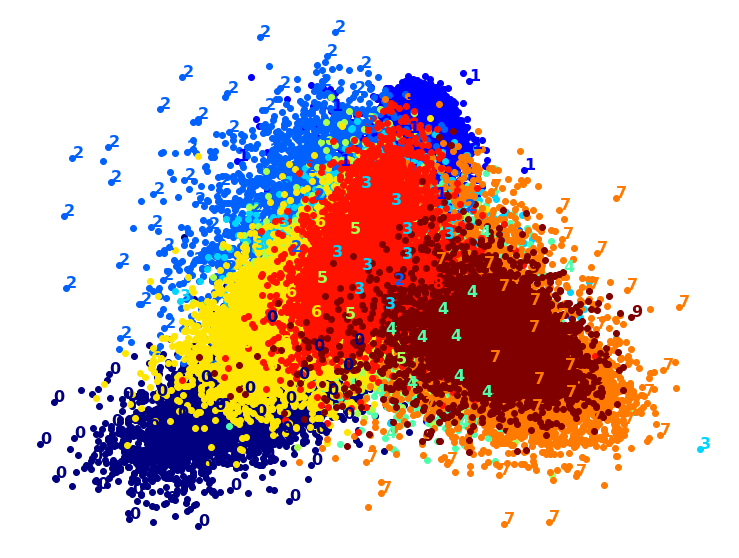

In [43]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import time

t0 = time.time()
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda_reduced = lda.fit_transform(X, y)
t1 = time.time()

print("LDA 시간: {:.1f}s.".format(t1 - t0))
plot_digits(X_lda_reduced, y)
plt.show()

LDA의 성능을 평가하시오. (좋음/보통/나쁨 + 이유)

답: 나쁨. 중복된 군집이 아주 많이 보인다.

#### 4. 분산의 95%를 보존하도록 먼저 PCA를 적용한 뒤 LDA를 시행하는 파이프라인을 만들고, 이 파이프라인의 수행시간과 산점도를 출력하세요.

PCA+LDA 시간: 8.5s.


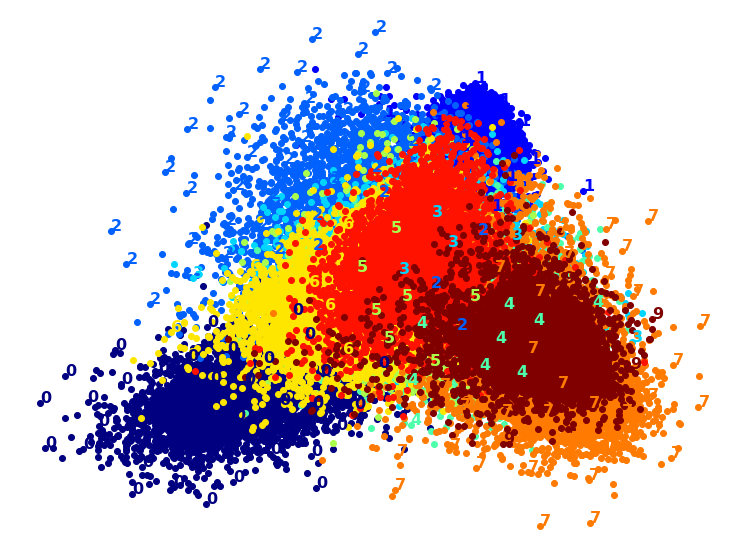

In [46]:
from sklearn.pipeline import Pipeline

pca_lda = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("lda", LinearDiscriminantAnalysis(n_components=2)),
])
t0 = time.time()
X_pca_lda_reduced = pca_lda.fit_transform(X, y)
t1 = time.time()
print("PCA+LDA 시간: {:.1f}s.".format(t1 - t0))
plot_digits(X_pca_lda_reduced, y)
plt.show()

LDA 알고리즘만을 수행했을 때보다 성능이 더 좋아졌는가? 수행시간과 산점도에 대해 각각 평가하세요. (더 좋아짐/그대로/더 나빠짐)

답: 수행시간은 더 빨라졌고, 산점도 또한 겹치는 군집이 LDA 알고리즘만 수행했을 때 보다 줄어들었다. 따라서 성능이 조금 더 좋아졌다고 볼 수 있다. 